In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn import datasets
import random
import seaborn as sns

### Data creation

In [53]:
data=pd.read_csv("california_housing_train.csv")

In [54]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [57]:
total_actual_values_HMA

0        15.0
1        19.0
2        17.0
3        14.0
4        20.0
         ... 
16995    52.0
16996    36.0
16997    17.0
16998    19.0
16999    52.0
Name: housing_median_age, Length: 17000, dtype: float64

<Axes: xlabel='housing_median_age', ylabel='Density'>

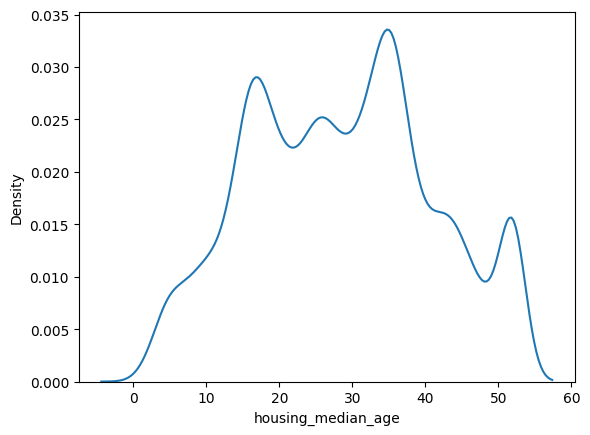

In [58]:
sns.kdeplot(data=data, x='housing_median_age')

In [59]:
value=[]
index=[]
for i in range(len(data)):
    r=random.randint(0,4)
    if r==1:
        value.append(data['housing_median_age'][i])
        index.append(i)
        data['housing_median_age'][i]=None
    else:
        pass

In [60]:
data['housing_median_age'].isnull().sum()

3417

In [61]:
index_value_dic=dict(zip(index,value))

In [62]:
index_value_dic

{6: 25.0,
 8: 34.0,
 14: 15.0,
 25: 34.0,
 27: 14.0,
 34: 19.0,
 43: 13.0,
 46: 32.0,
 48: 20.0,
 50: 30.0,
 51: 18.0,
 53: 32.0,
 70: 24.0,
 78: 25.0,
 82: 46.0,
 84: 29.0,
 104: 20.0,
 121: 12.0,
 124: 15.0,
 131: 17.0,
 135: 13.0,
 143: 18.0,
 151: 28.0,
 167: 25.0,
 170: 33.0,
 178: 20.0,
 179: 15.0,
 180: 11.0,
 183: 10.0,
 193: 7.0,
 205: 9.0,
 207: 25.0,
 208: 17.0,
 210: 14.0,
 217: 18.0,
 220: 5.0,
 237: 10.0,
 239: 26.0,
 243: 16.0,
 246: 13.0,
 254: 28.0,
 256: 31.0,
 258: 22.0,
 272: 11.0,
 287: 14.0,
 288: 4.0,
 290: 16.0,
 292: 19.0,
 297: 35.0,
 300: 15.0,
 301: 6.0,
 307: 17.0,
 310: 18.0,
 312: 17.0,
 317: 32.0,
 323: 13.0,
 332: 10.0,
 336: 14.0,
 338: 15.0,
 343: 30.0,
 344: 34.0,
 352: 21.0,
 356: 19.0,
 360: 21.0,
 361: 16.0,
 363: 22.0,
 366: 8.0,
 372: 16.0,
 375: 9.0,
 379: 16.0,
 380: 17.0,
 384: 26.0,
 385: 18.0,
 391: 19.0,
 396: 38.0,
 403: 8.0,
 404: 24.0,
 405: 10.0,
 407: 19.0,
 409: 18.0,
 413: 18.0,
 414: 31.0,
 421: 33.0,
 427: 30.0,
 430: 35.0,
 441: 

In [37]:
data['housing_median_age'].isnull().mean()*100

35.55294117647059

### Using Mean

In [63]:

data['housing_median_age'].fillna(data['housing_median_age'].mean(),inplace=True)

<Axes: xlabel='housing_median_age', ylabel='Density'>

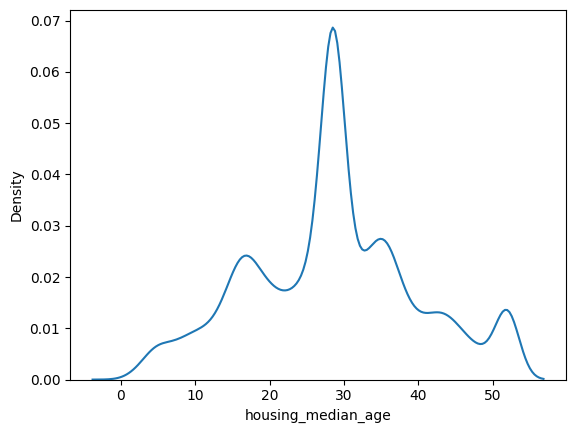

In [68]:
sns.kdeplot(data=data, x='housing_median_age')

In [14]:
value_mean=[]
for i in range(len(data)):
    if i in index:
        value_mean.append(data['housing_median_age'][i])
        data['housing_median_age'][i]=None
    

In [15]:
len(value_mean)

3388

### Median

In [16]:
data['housing_median_age'].fillna(data['housing_median_age'].median(),inplace=True)

<Axes: xlabel='housing_median_age', ylabel='Density'>

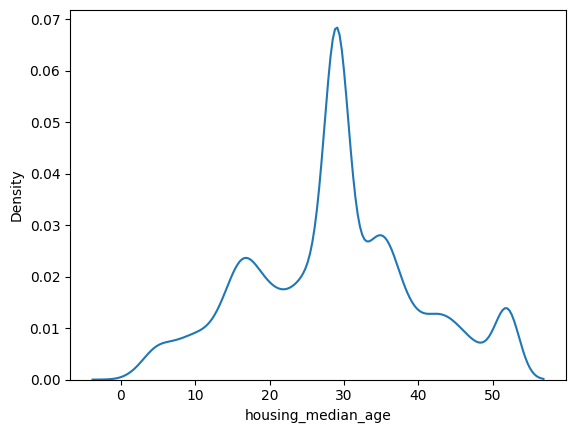

In [18]:
sns.kdeplot(data=data, x='housing_median_age')

In [20]:
value_median=[]
for i in range(len(data)):
    if i in index:
        value_median.append(data['housing_median_age'][i])
        data['housing_median_age'][i]=None
    

In [21]:
len(value_median)

3388

### KNNImputer 

In [22]:
from sklearn.impute import KNNImputer
knn=KNNImputer(n_neighbors=3)
data_demo = knn.fit_transform(data)

In [23]:
third_elements = [row[2] for row in data_demo]

Text(0.5, 0, 'housing_median_age')

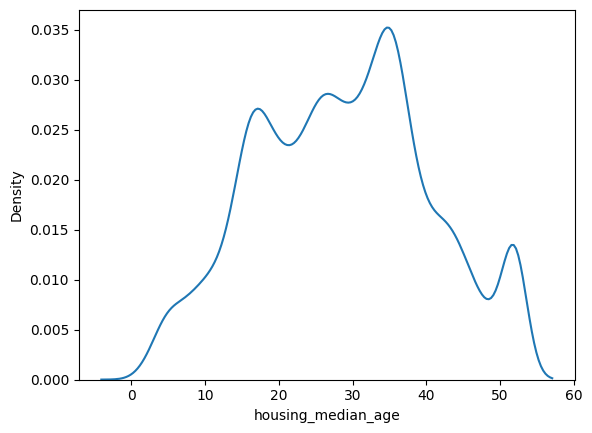

In [24]:
sns.kdeplot(data=data, x=third_elements)
plt.xlabel("housing_median_age")

In [25]:
value_knn=[]
for i in range(len(data)):
    if i in index:
        value_knn.append(third_elements[i])

In [26]:
df = pd.DataFrame({
    'index': index,
    'value': value,
    'value_mean': value_mean,
    'value_median': value_median,
    'value_knn': value_knn
})

In [27]:
df.head(10)

,index,value,value_mean,value_median,value_knn
0,1,19.0,28.671834,29.0,22.333333
1,4,20.0,28.671834,29.0,35.000000
2,6,25.0,28.671834,29.0,16.333333
3,13,31.0,28.671834,29.0,28.000000
4,14,15.0,28.671834,29.0,26.666667
5,15,17.0,28.671834,29.0,24.000000
6,17,21.0,28.671834,29.0,28.000000
7,27,14.0,28.671834,29.0,30.000000
8,30,38.0,28.671834,29.0,28.333333
9,39,19.0,28.671834,29.0,31.000000


In [79]:
data_for_graph=pd.read_csv("california_housing_train.csv")

### Actual value plot vs Mean Plot

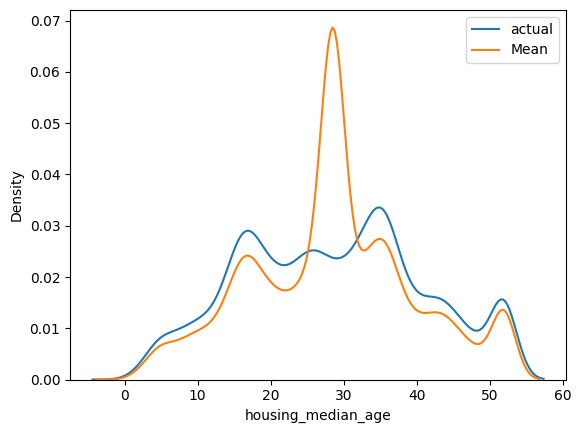

In [75]:
sns.kdeplot(data=data, x=data_for_graph['housing_median_age'], label="actual")
sns.kdeplot(data=data, x=values_with_means, label="Mean")

plt.xlabel("housing_median_age")
plt.legend()

plt.show()

### Median vs actual

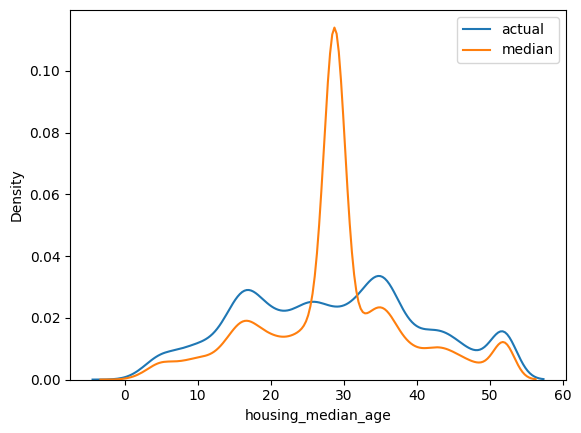

In [76]:
sns.kdeplot(data=data, x=data_for_graph['housing_median_age'], label="actual")
sns.kdeplot(data=data, x=values_with_median, label="median")

plt.xlabel("housing_median_age")
plt.legend()

plt.show()

### Actual value plot vs KNN plot

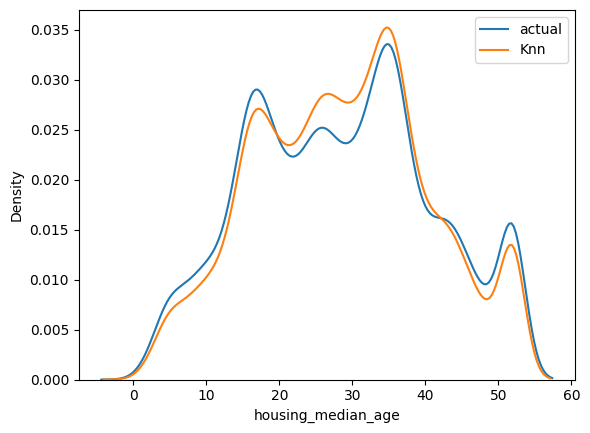

In [78]:
sns.kdeplot(data=data, x=data_for_graph['housing_median_age'], label="actual")
sns.kdeplot(data=data, x=third_elements, label="Knn")

plt.xlabel("housing_median_age")
plt.legend()

plt.show()